# Reading and Understanding the data

In [1]:
# supress the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the csv file
df=pd.read_csv(r'C:\Users\hp\Downloads\day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# inspecting the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


The dataset has 730 rows and 16 columns.Clearly, there are no null values to be dealt with.

In [5]:
# Describing the numeric variables
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Now since our target variable to be predicted is 'cnt', which is the sum of casual and registered customers, so the variables 'casual' and 'registered' won't be used in the model-building process.

In [6]:
# Dropping 'casual' and 'registered' columns
df=df.drop(labels=['casual','registered'],axis=1)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


# Data Visualisation

In [7]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [8]:
# Reassigning the categories of season
def ass_season(x):
 if x==1:
    return 'Spring'
 elif x==2:
    return 'Summer'
 elif x==3:
    return 'Fall'
 elif x==4:
    return 'Winter'

In [9]:
df.season=df.season.apply(ass_season)

Text(0.5, 1.0, 'count vs season')

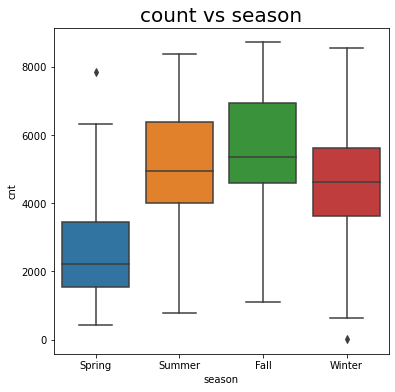

In [10]:
plt.figure(figsize=(6,6))
sns.boxplot(x=df.season,y=df.cnt)
plt.title('count vs season',fontdict={'fontsize':20})


Summer and Fall seasons had the highest ridership 

In [11]:
df.mnth.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [12]:
def ass_mnth(x):
    return x.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jn',7:'Jly',
                  8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})

In [13]:
df.mnth=df.mnth.replace([1,2,3,4,5,6,7,8,9,10,11,12],
                        value=['Jan','Feb','Mar','Apr','May','Jn','Jly','Aug','Sept','Oct','Nov','Dec'])

Text(0.5, 1.0, 'count vs month')

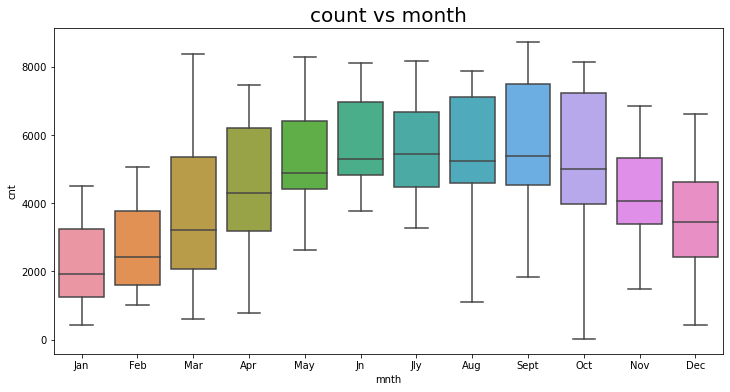

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df.mnth,y=df.cnt)
plt.title('count vs month',fontdict={'fontsize':20})

In [15]:
df.yr=df.yr.astype('object')

Text(0.5, 1.0, 'count vs year')

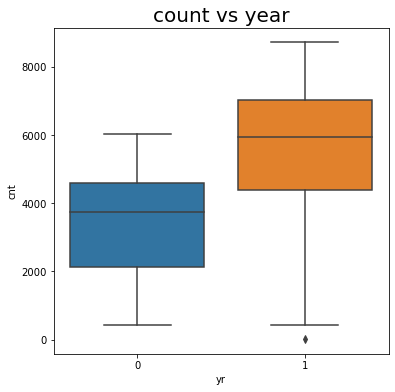

In [16]:
plt.figure(figsize=(6,6))
sns.boxplot(x=df.yr,y=df.cnt)
plt.title('count vs year',fontdict={'fontsize':20})

In [17]:
df.holiday=df.holiday.astype('object')

Text(0.5, 1.0, 'count vs Holiday')

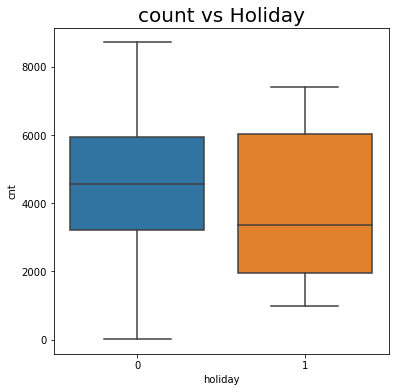

In [18]:
plt.figure(figsize=(6,6))
sns.boxplot(x=df.holiday,y=df.cnt)
plt.title('count vs Holiday',fontdict={'fontsize':20})

In [19]:
df.weekday=df.weekday.replace([0,1,2,3,4,5,6],['Sun','Mon','Tues','Wed','Thr','Fri','Sat'])

Text(0.5, 1.0, 'count vs weekday')

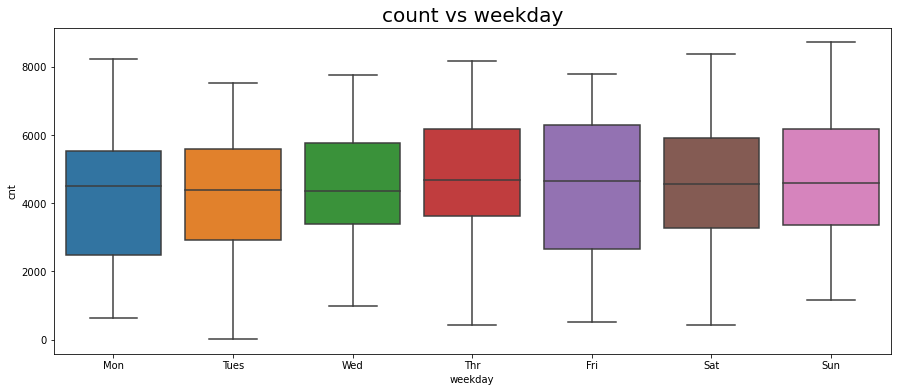

In [20]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df.weekday,y=df.cnt)
plt.title('count vs weekday',fontdict={'fontsize':20})

In [21]:
df.workingday=df.workingday.astype('object')

Text(0.5, 1.0, 'count vs workingday')

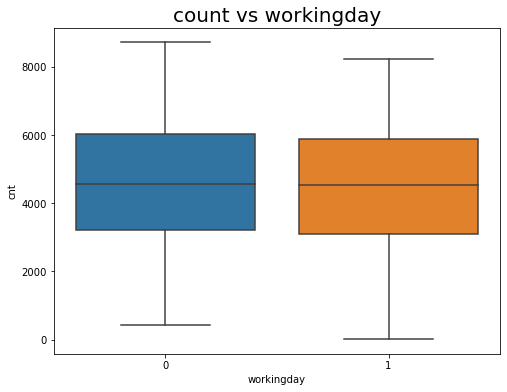

In [22]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df.workingday,y=df.cnt)
plt.title('count vs workingday',fontdict={'fontsize':20})

In [23]:
# Dropping 'atemp' column as 'temp' would suffice for model building
df=df.drop('atemp',axis=1)
df.shape

(730, 13)

In [24]:
# Dropping 'instant' and 'dteday' as they are irrelevant for predicting the target variable
df=df.drop(['instant','dteday'],axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,1,2,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,0,Tues,1,2,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,1,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thr,1,1,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,1,9.305237,43.6957,12.522300,1600


In [25]:
df.dtypes

season         object
yr             object
mnth           object
holiday        object
weekday        object
workingday     object
weathersit      int64
temp          float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

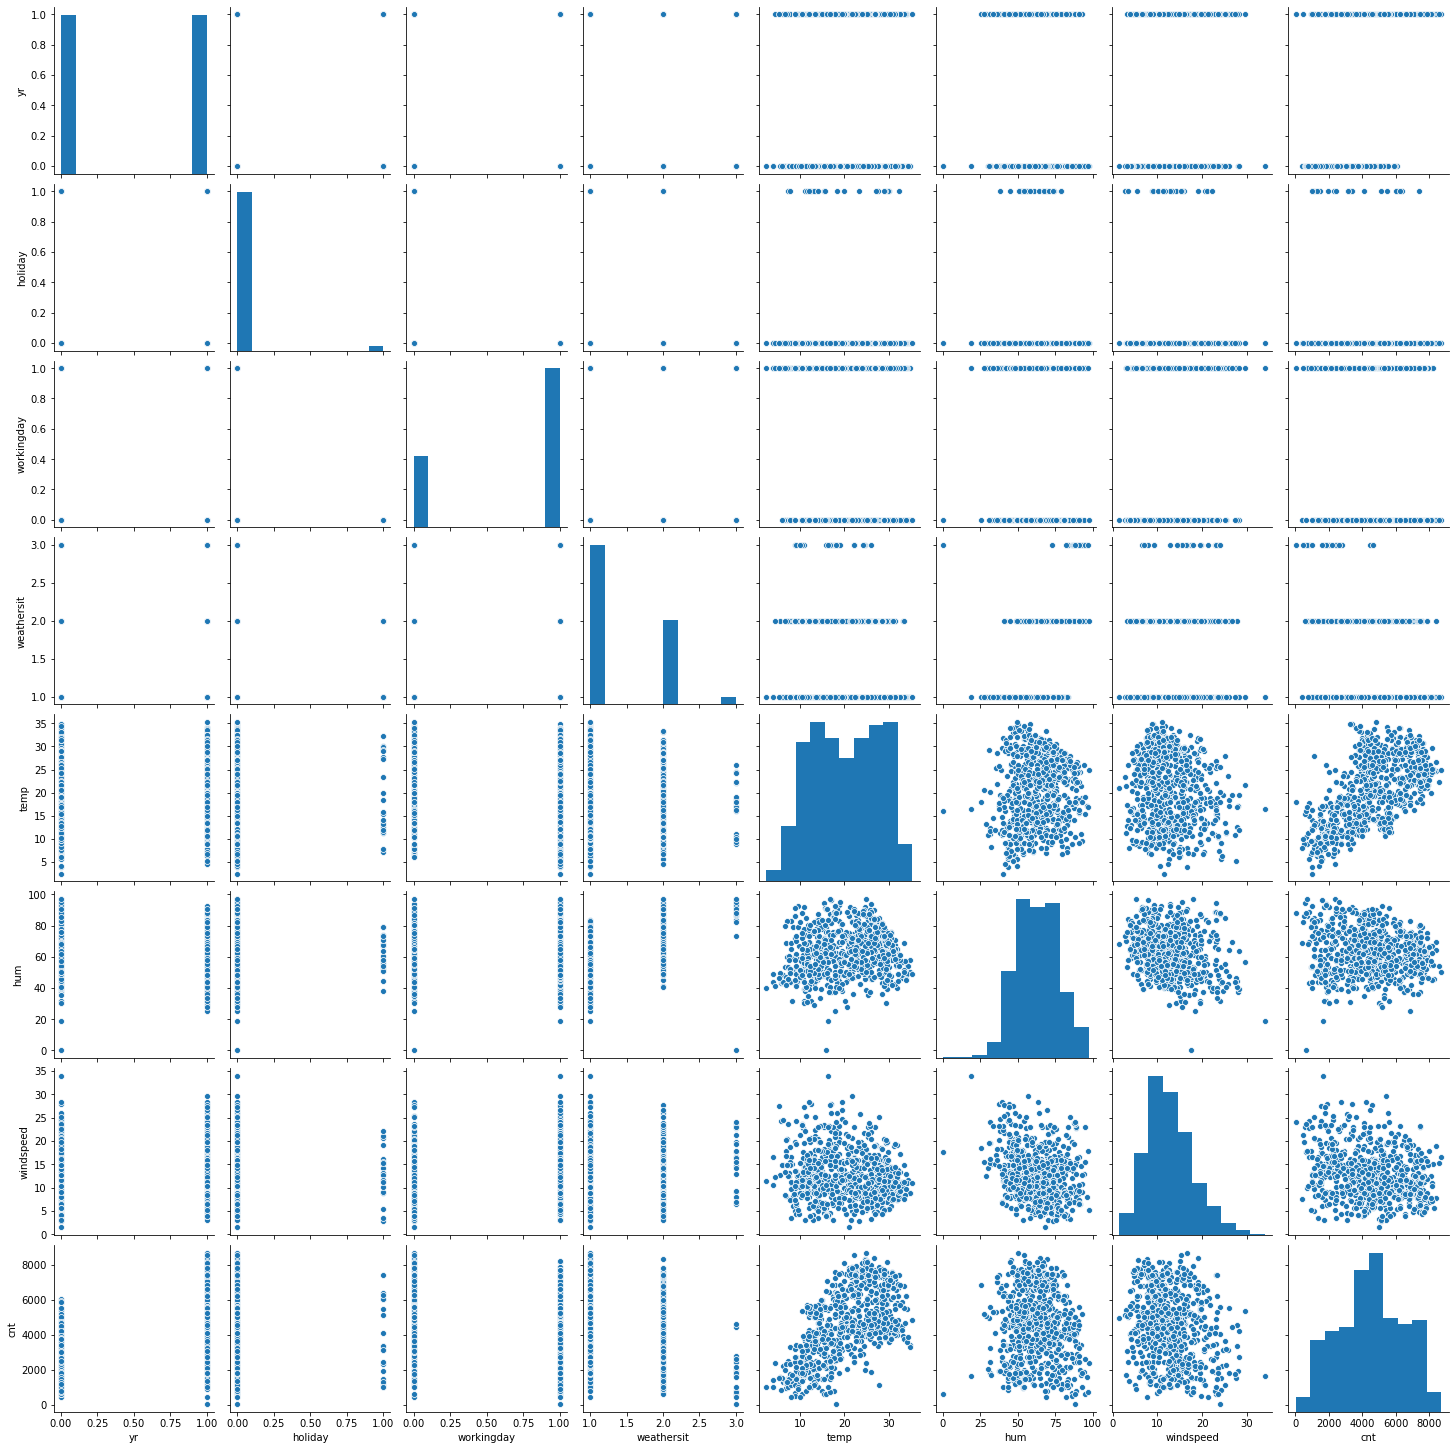

In [26]:
sns.pairplot(df)

- 'Temp' shows some signs of linear trend with 'cnt', while 'hum' and 'windspeed' aren't really affecting the target variable 'cnt'.

# Data Preparation

In [27]:
# Converting 'yr', 'holiday', and 'workingday' into int-type variables
df.yr=df.yr.astype('int')
df.holiday=df.holiday.astype('int')
df.workingday=df.workingday.astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int32  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int32  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int32  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int32(3), int64(2), object(3)
memory usage: 54.3+ KB


### Dummy Variables

In [28]:
# Creating the dummy variables for 'season', 'month', 'weekday' and 'weathersit'
df1=pd.get_dummies(df.season,drop_first=True)
df1

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


- 'Fall' season gets dropped,which corresponds to (000)

In [29]:
df2=pd.get_dummies(df.mnth,drop_first=True)
df2

,Aug,Dec,Feb,Jan,Jly,Jn,Mar,May,Nov,Oct,Sept
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,0,0,0,0,0,0,0,0,0
726,0,1,0,0,0,0,0,0,0,0,0
727,0,1,0,0,0,0,0,0,0,0,0
728,0,1,0,0,0,0,0,0,0,0,0


- 'April' corresponds to (00000000000)

In [30]:
df3=pd.get_dummies(df.weekday,drop_first=True)
df3

,Mon,Sat,Sun,Thr,Tues,Wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
725,0,0,0,0,0,0
726,0,1,0,0,0,0
727,0,0,1,0,0,0
728,1,0,0,0,0,0


- 'Friday' corresponds to (000000)  

In [31]:
df4=pd.get_dummies(df.weathersit,drop_first=True)
df4

,2,3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
725,1,0
726,1,0
727,1,0
728,0,0


- '1' ie 'clear/partly cloudy' corresponds to (000)

In [32]:
# Add results to the original dataframe 'df'
df=pd.concat([df,df1,df2,df3,df4],axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Oct,Sept,Mon,Sat,Sun,Thr,Tues,Wed,2,3
0,Spring,0,Jan,0,Mon,1,2,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,1,0
1,Spring,0,Jan,0,Tues,1,2,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,1,0,1,0
2,Spring,0,Jan,0,Wed,1,1,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,Spring,0,Jan,0,Thr,1,1,8.200000,59.0435,10.739832,...,0,0,0,0,0,1,0,0,0,0
4,Spring,0,Jan,0,Fri,1,1,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# Now we drop features 'season','mnth', and 'weekday' since we have the dummies for the same
df=df.drop(['season','mnth','weekday','weathersit'],axis=1)
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Oct,Sept,Mon,Sat,Sun,Thr,Tues,Wed,2,3
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Data Splitting

In [34]:
# Performing a train-test split using sklearn library
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train,df_test=train_test_split(df, train_size=.7, test_size=.3, random_state=100)

### Feature Scaling
It is important to standardise the variables so that the magnitudes of the regression coefficients obtained, are all on the same scale of measurement.

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [36]:
nume_vars=['temp','hum','windspeed','cnt']

df_train[nume_vars]=scaler.fit_transform(df_train[nume_vars])
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Oct,Sept,Mon,Sat,Sun,Thr,Tues,Wed,2,3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.343137,0.029412
std,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


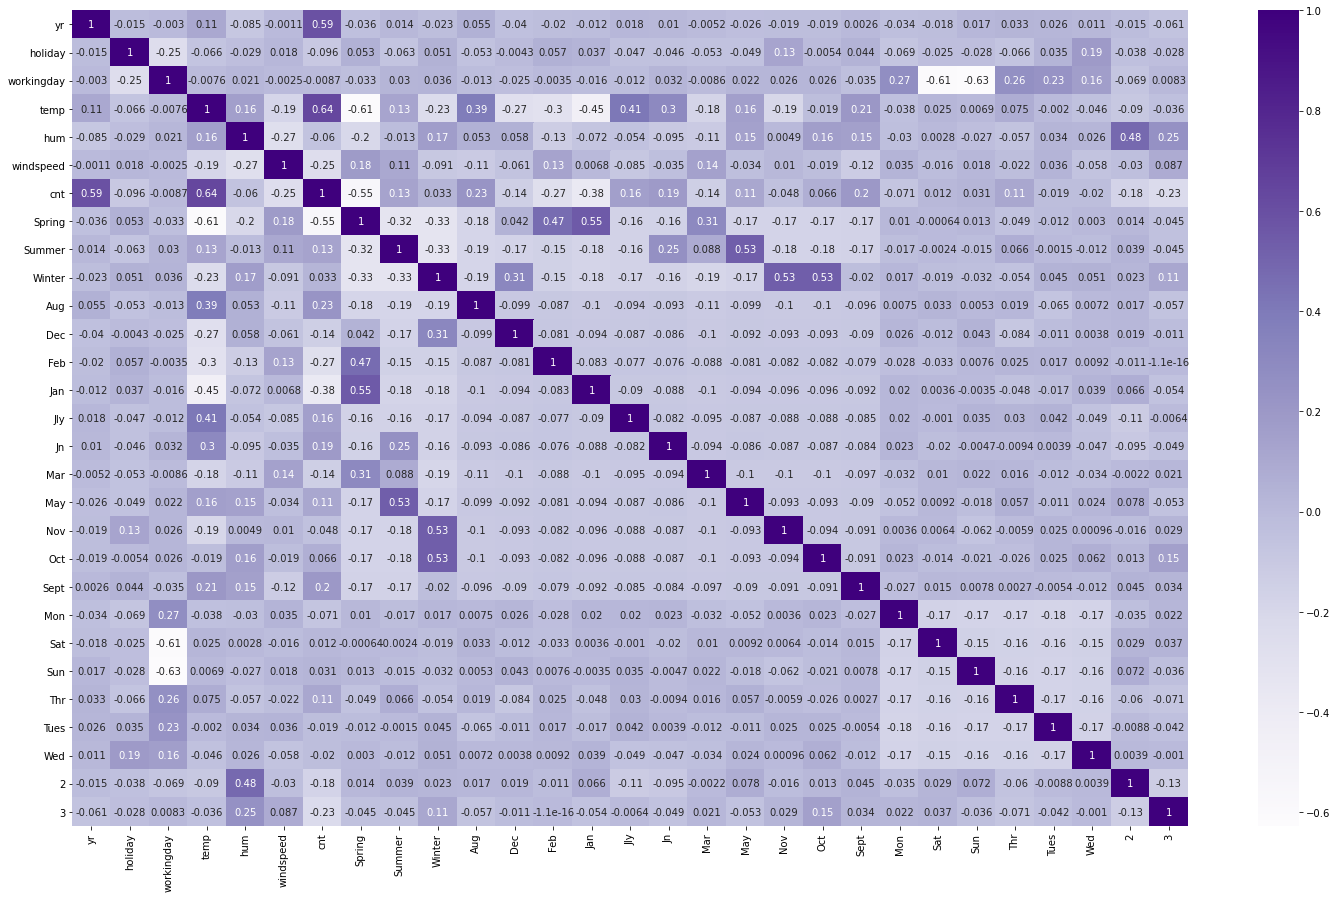

In [37]:
# Now let us check the degree of correlation in the df_train dataset
plt.figure(figsize=(25,15))
sns.heatmap(df_train.corr(),annot=True,cmap='Purples')
plt.show()

- As we can see, target 'cnt' shows high correlations with 'temp' and 'yr'

<function matplotlib.pyplot.show(*args, **kw)>

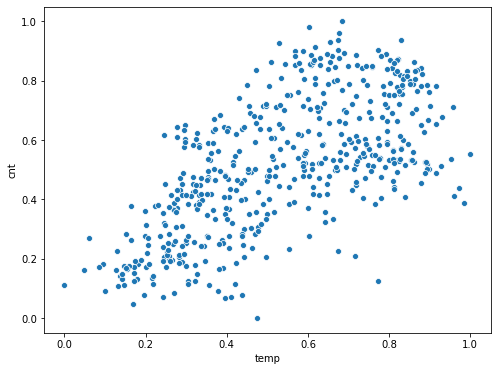

In [38]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_train.temp,y=df_train.cnt)
plt.show

- So considering 'temp' as the first variable, we will try to fit the regression line to it.

# Model Building

- ## Manual Feature Elimination

In [39]:
# Dividing the train dataset into X and Y for making the model
y_train=df_train.pop('cnt')
X_train=df_train

In [40]:
import statsmodels.api as sm

# Adding a constant 
X_train_lm=sm.add_constant(X_train['temp'])

# Create the first model
lm=sm.OLS(y_train,X_train_lm).fit()

In [41]:
# Checking the parameters
lm.params

const    0.169798
temp     0.639952
dtype: float64

In [42]:
X_train_lm.head()

,const,temp
653,1.0,0.509887
576,1.0,0.815169
426,1.0,0.442393
728,1.0,0.245101
482,1.0,0.395666


<function matplotlib.pyplot.show(*args, **kw)>

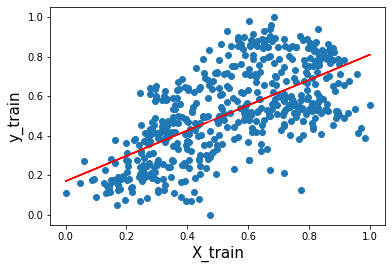

In [43]:
# Now let us visualise the fitted model
plt.scatter(X_train_lm.loc[:,'temp'],y_train)
plt.plot(X_train_lm.loc[:,'temp'],lm.params[0]+lm.params[1]*X_train_lm.loc[:,'temp'],'r')
plt.xlabel('X_train',fontsize=15)
plt.ylabel('y_train',fontsize=15)
plt.show

In [44]:
# Print a summary of the above model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Mon, 25 Jan 2021   Prob (F-statistic):           5.80e-61
Time:                        22:34:58   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.000       0.131       0.208
temp           0.6400      0.034     18.949      0.000       0.574       0.706
==============================================================================
Omnibus:                        6.280   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                4.555
Skew:                           0.098   Prob(JB):                        0.103
Kurtosis:                       2.580   Cond. No.                         5.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- R-squared is 0.414 and regression coefficient for 'temp' is significant.

### Adding another variables

In [45]:
# Now adding second highly correlated variable, ie 'yr'
X_train_lm=sm.add_constant(X_train[['temp','yr']])

lm=sm.OLS(y_train,X_train_lm).fit()

lm.params

const    0.079628
temp     0.583559
yr       0.237213
dtype: float64

In [46]:
# Check the summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     564.9
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          9.25e-130
Time:                        22:34:58   Log-Likelihood:                 337.38
No. Observations:                 510   AIC:                            -668.8
Df Residuals:                     507   BIC:                            -656.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0796      0.015      5.331      0.000       0.050       0.109
temp           0.5836      0.025     23.604      0.000       0.535       0.632
yr             0.2372      0.011     21.261      0.000       0.215       0.259
==============================================================================
Omnibus:                       31.402   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.724
Skew:                          -0.503   Prob(JB):                     5.28e-10
Kurtosis:                       4.000   Cond. No.                         6.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- The model has improved as the adjusted R-squared has gone up to 0.689 from 0.413 and all the Beta coefficients are significant.

### Adding all the remaining variables to the model

In [47]:
# building the model including all the remaining varaibles

X_train_lm=sm.add_constant(X_train)

lm_1=sm.OLS(y_train,X_train_lm).fit()

lm_1.params

const         0.394543
yr            0.230857
holiday      -0.135424
workingday   -0.060524
temp          0.445458
hum          -0.157315
windspeed    -0.183046
Spring       -0.043705
Summer        0.042243
Winter        0.110897
Aug           0.021507
Dec          -0.045669
Feb          -0.037279
Jan          -0.063612
Jly          -0.034910
Jn            0.000975
Mar           0.000608
May           0.024064
Nov          -0.041555
Oct           0.005790
Sept          0.086055
Mon          -0.024633
Sat          -0.056319
Sun          -0.049961
Thr           0.003863
Tues         -0.026299
Wed          -0.011241
2            -0.059355
3            -0.251511
dtype: float64

In [48]:
# Checking the summary
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.04
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          4.33e-179
Time:                        22:34:58   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     481   BIC:                            -866.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3945      0.085      4.640      0.000       0.227       0.562
yr             0.2309      0.008     28.387      0.000       0.215       0.247
holiday       -0.1354      0.065     -2.072      0.039      -0.264      -0.007
workingday    -0.0605      0.071     -0.852      0.395      -0.200       0.079
temp           0.4455      0.047      9.513      0.000       0.353       0.537
hum           -0.1573      0.039     -4.049      0.000      -0.234      -0.081
windspeed     -0.1830      0.026     -7.036      0.000      -0.234      -0.132
Spring        -0.0437      0.030     -1.444      0.149      -0.103       0.016
Summer         0.0422      0.026      1.598      0.111      -0.010       0.094
Winter         0.1109      0.028      3.938      0.000       0.056       0.166
Aug            0.0215      0.034      0.632      0.527      -0.045       0.088
Dec           -0.0457      0.034     -1.348      0.178      -0.112       0.021
Feb           -0.0373      0.033     -1.121      0.263      -0.103       0.028
Jan           -0.0636      0.034     -1.880      0.061      -0.130       0.003
Jly           -0.0349      0.035     -0.985      0.325      -0.105       0.035
Jn             0.0010      0.025      0.038      0.969      -0.049       0.051
Mar            0.0006      0.025      0.025      0.980      -0.048       0.049
May            0.0241      0.021      1.134      0.257      -0.018       0.066
Nov           -0.0416      0.037     -1.133      0.258      -0.114       0.031
Oct            0.0058      0.036      0.160      0.873      -0.065       0.077
Sept           0.0861      0.032      2.667      0.008       0.023       0.149
Mon           -0.0246      0.015     -1.690      0.092      -0.053       0.004
Sat           -0.0563      0.072     -0.787      0.432      -0.197       0.084
Sun           -0.0500      0.071     -0.699      0.485      -0.190       0.091
Thr            0.0039      0.015      0.258      0.796      -0.026       0.033
Tues          -0.0263      0.015     -1.792      0.074      -0.055       0.003
Wed           -0.0112      0.015     -0.736      0.462      -0.041       0.019
2             -0.0594      0.011     -5.637      0.000      -0.080      -0.039
3             -0.2515      0.027     -9.455      0.000      -0.304      -0.199
==============================================================================
Omnibus:                       78.889   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.035
Skew:                          -0.768   Prob(JB):                     4.06e-46
Kurtosis:                       5.735   Cond. No.                         70.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is

- Clearly there are some features with high p-values(greater than 0.05),which can be dropped, starting with the highest. We can supplement dropping with the VIF information

### Variance Inflation Factor (VIF)

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,63.89
3,temp,43.99
4,hum,41.17
6,Spring,13.54
8,Winter,12.51
22,Sun,12.35
21,Sat,11.83
7,Summer,9.84
17,Nov,7.16
18,Oct,6.96


- In practice, a VIF greater than 5 is considered significant and apparantly there are quite a few features that need attention.

### Dropping the variables and updating the model

In [51]:
# Dropping the insignificant variables
X=X_train.drop('Mar',1)


In [52]:
# Build the third model
X_train_lm=sm.add_constant(X)

lm_2=sm.OLS(y_train,X_train_lm).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     101.9
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          4.24e-180
Time:                        22:34:59   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -991.6
Df Residuals:                     482   BIC:                            -873.1
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3949      0.084      4.729      0.000       0.231       0.559
yr             0.2309      0.008     28.416      0.000       0.215       0.247
holiday       -0.1354      0.065     -2.074      0.039      -0.264      -0.007
workingday    -0.0605      0.071     -0.853      0.394      -0.200       0.079
temp           0.4453      0.046      9.653      0.000       0.355       0.536
hum           -0.1572      0.039     -4.064      0.000      -0.233      -0.081
windspeed     -0.1831      0.026     -7.052      0.000      -0.234      -0.132
Spring        -0.0435      0.029     -1.519      0.130      -0.100       0.013
Summer         0.0421      0.026      1.625      0.105      -0.009       0.093
Winter         0.1110      0.028      4.016      0.000       0.057       0.165
Aug            0.0212      0.032      0.662      0.508      -0.042       0.084
Dec           -0.0462      0.026     -1.762      0.079      -0.098       0.005
Feb           -0.0379      0.022     -1.687      0.092      -0.082       0.006
Jan           -0.0642      0.023     -2.852      0.005      -0.108      -0.020
Jly           -0.0352      0.034     -1.041      0.298      -0.102       0.031
Jn             0.0008      0.024      0.032      0.974      -0.046       0.048
May            0.0239      0.020      1.204      0.229      -0.015       0.063
Nov           -0.0420      0.031     -1.354      0.176      -0.103       0.019
Oct            0.0053      0.031      0.173      0.863      -0.055       0.066
Sept           0.0857      0.029      2.924      0.004       0.028       0.143
Mon           -0.0247      0.015     -1.695      0.091      -0.053       0.004
Sat           -0.0563      0.072     -0.788      0.431      -0.197       0.084
Sun           -0.0499      0.071     -0.699      0.485      -0.190       0.090
Thr            0.0039      0.015      0.259      0.796      -0.025       0.033
Tues          -0.0263      0.015     -1.796      0.073      -0.055       0.002
Wed           -0.0112      0.015     -0.737      0.461      -0.041       0.019
2             -0.0594      0.011     -5.643      0.000      -0.080      -0.039
3             -0.2515      0.027     -9.465      0.000      -0.304      -0.199
==============================================================================
Omnibus:                       78.874   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.108
Skew:                          -0.768   Prob(JB):                     3.92e-46
Kurtosis:                       5.735   Cond. No.                         70.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# Calculate the VIFs for lm_2
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,57.64
3,temp,43.34
4,hum,40.56
8,Winter,11.96
6,Spring,11.60
21,Sun,11.11
20,Sat,10.72
7,Summer,9.64
9,Aug,6.21
5,windspeed,5.59


- One can observe that 'workingday' is the feature which has both, high VIF score and a high p-value. So, it can be dropped

In [54]:
# Dropping 'workingday' variable
X=X.drop('workingday',1)

In [55]:
# Build the model again
X_train_lm=sm.add_constant(X)

lm_3=sm.OLS(y_train,X_train_lm).fit()
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     105.8
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          5.85e-181
Time:                        22:34:59   Log-Likelihood:                 523.42
No. Observations:                 510   AIC:                            -992.8
Df Residuals:                     483   BIC:                            -878.5
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3333      0.042      7.974      0.000       0.251       0.415
yr             0.2313      0.008     28.525      0.000       0.215       0.247
holiday       -0.0844      0.026     -3.222      0.001      -0.136      -0.033
temp           0.4469      0.046      9.698      0.000       0.356       0.537
hum           -0.1564      0.039     -4.046      0.000      -0.232      -0.080
windspeed     -0.1837      0.026     -7.082      0.000      -0.235      -0.133
Spring        -0.0432      0.029     -1.510      0.132      -0.099       0.013
Summer         0.0423      0.026      1.632      0.103      -0.009       0.093
Winter         0.1102      0.028      3.991      0.000       0.056       0.165
Aug            0.0206      0.032      0.643      0.521      -0.042       0.084
Dec           -0.0453      0.026     -1.732      0.084      -0.097       0.006
Feb           -0.0372      0.022     -1.660      0.098      -0.081       0.007
Jan           -0.0637      0.023     -2.831      0.005      -0.108      -0.019
Jly           -0.0358      0.034     -1.059      0.290      -0.102       0.031
Jn             0.0002      0.024      0.008      0.994      -0.047       0.047
May            0.0233      0.020      1.174      0.241      -0.016       0.062
Nov           -0.0431      0.031     -1.391      0.165      -0.104       0.018
Oct            0.0060      0.031      0.195      0.846      -0.055       0.067
Sept           0.0859      0.029      2.930      0.004       0.028       0.143
Mon           -0.0247      0.015     -1.700      0.090      -0.053       0.004
Sat            0.0033      0.015      0.217      0.828      -0.026       0.033
Sun            0.0096      0.015      0.640      0.523      -0.020       0.039
Thr            0.0037      0.015      0.250      0.803      -0.026       0.033
Tues          -0.0260      0.015     -1.779      0.076      -0.055       0.003
Wed           -0.0104      0.015     -0.685      0.493      -0.040       0.019
2             -0.0592      0.011     -5.629      0.000      -0.080      -0.039
3             -0.2514      0.027     -9.463      0.000      -0.304      -0.199
==============================================================================
Omnibus:                       78.373   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.112
Skew:                          -0.769   Prob(JB):                     4.76e-45
Kurtosis:                       5.691   Cond. No.                         28.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,37.21
3,hum,35.65
7,Winter,10.69
5,Spring,8.31
6,Summer,7.02
8,Aug,5.67
12,Jly,5.15
16,Oct,5.11
4,windspeed,5.08
15,Nov,4.85


In [57]:
# Dropping 'Jn' from the dataset and rebuilding the model
X=X.drop('Jn',1)

X_train_lm=sm.add_constant(X)

lm_4=sm.OLS(y_train,X_train_lm).fit()
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     110.3
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          5.51e-182
Time:                        22:35:00   Log-Likelihood:                 523.42
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     484   BIC:                            -884.8
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3333      0.042      8.021      0.000       0.252       0.415
yr             0.2313      0.008     28.704      0.000       0.215       0.247
holiday       -0.0844      0.026     -3.229      0.001      -0.136      -0.033
temp           0.4471      0.039     11.483      0.000       0.371       0.524
hum           -0.1565      0.038     -4.074      0.000      -0.232      -0.081
windspeed     -0.1837      0.026     -7.124      0.000      -0.234      -0.133
Spring        -0.0433      0.027     -1.596      0.111      -0.097       0.010
Summer         0.0422      0.025      1.689      0.092      -0.007       0.091
Winter         0.1102      0.027      4.063      0.000       0.057       0.164
Aug            0.0204      0.025      0.815      0.416      -0.029       0.070
Dec           -0.0454      0.026     -1.740      0.082      -0.097       0.006
Feb           -0.0372      0.022     -1.667      0.096      -0.081       0.007
Jan           -0.0637      0.022     -2.867      0.004      -0.107      -0.020
Jly           -0.0359      0.026     -1.381      0.168      -0.087       0.015
May            0.0232      0.018      1.325      0.186      -0.011       0.058
Nov           -0.0432      0.031     -1.409      0.159      -0.103       0.017
Oct            0.0059      0.030      0.199      0.842      -0.053       0.065
Sept           0.0857      0.025      3.490      0.001       0.037       0.134
Mon           -0.0247      0.015     -1.703      0.089      -0.053       0.004
Sat            0.0033      0.015      0.217      0.828      -0.026       0.033
Sun            0.0096      0.015      0.640      0.522      -0.020       0.039
Thr            0.0037      0.015      0.250      0.802      -0.026       0.033
Tues          -0.0260      0.015     -1.781      0.076      -0.055       0.003
Wed           -0.0104      0.015     -0.686      0.493      -0.040       0.019
2             -0.0592      0.010     -5.638      0.000      -0.080      -0.039
3             -0.2514      0.027     -9.473      0.000      -0.303      -0.199
==============================================================================
Omnibus:                       78.356   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.991
Skew:                          -0.769   Prob(JB):                     5.06e-45
Kurtosis:                       5.690   Cond. No.                         26.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,35.45
2,temp,21.68
7,Winter,10.42
5,Spring,7.44
6,Summer,6.59
4,windspeed,5.06
15,Oct,4.82
14,Nov,4.77
8,Aug,3.44
9,Dec,3.34


In [59]:
# Now removing 'Oct' with 0.842 as p-value
X=X.drop('Oct',1)

X_train_lm=sm.add_constant(X)

lm_5=sm.OLS(y_train,X_train_lm).fit()
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     115.1
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          5.18e-183
Time:                        22:35:00   Log-Likelihood:                 523.40
No. Observations:                 510   AIC:                            -996.8
Df Residuals:                     485   BIC:                            -890.9
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3346      0.041      8.167      0.000       0.254       0.415
yr             0.2312      0.008     28.734      0.000       0.215       0.247
holiday       -0.0840      0.026     -3.227      0.001      -0.135      -0.033
temp           0.4464      0.039     11.518      0.000       0.370       0.523
hum           -0.1555      0.038     -4.086      0.000      -0.230      -0.081
windspeed     -0.1834      0.026     -7.133      0.000      -0.234      -0.133
Spring        -0.0440      0.027     -1.642      0.101      -0.097       0.009
Summer         0.0405      0.023      1.727      0.085      -0.006       0.087
Winter         0.1131      0.023      4.950      0.000       0.068       0.158
Aug            0.0189      0.024      0.793      0.428      -0.028       0.066
Dec           -0.0491      0.018     -2.677      0.008      -0.085      -0.013
Feb           -0.0384      0.022     -1.777      0.076      -0.081       0.004
Jan           -0.0649      0.021     -3.031      0.003      -0.107      -0.023
Jly           -0.0374      0.025     -1.504      0.133      -0.086       0.011
May            0.0232      0.017      1.327      0.185      -0.011       0.058
Nov           -0.0479      0.019     -2.523      0.012      -0.085      -0.011
Sept           0.0834      0.022      3.865      0.000       0.041       0.126
Mon           -0.0246      0.014     -1.698      0.090      -0.053       0.004
Sat            0.0034      0.015      0.225      0.822      -0.026       0.033
Sun            0.0096      0.015      0.644      0.520      -0.020       0.039
Thr            0.0038      0.015      0.255      0.799      -0.025       0.033
Tues          -0.0260      0.015     -1.782      0.075      -0.055       0.003
Wed           -0.0104      0.015     -0.682      0.496      -0.040       0.019
2             -0.0593      0.010     -5.657      0.000      -0.080      -0.039
3             -0.2513      0.027     -9.480      0.000      -0.303      -0.199
==============================================================================
Omnibus:                       77.750   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.396
Skew:                          -0.765   Prob(JB):                     1.85e-44
Kurtosis:                       5.672   Cond. No.                         24.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,33.86
2,temp,21.67
5,Spring,7.42
7,Winter,6.17
6,Summer,5.95
4,windspeed,4.98
8,Aug,3.18
12,Jly,2.85
11,Jan,2.42
22,2,2.36


In [61]:
# Now removing 'Spring' since it is high in both the p-value(0.101) and VIF(7.42)
X=X.drop('Spring',1)

X_train_lm=sm.add_constant(X)

lm_6=sm.OLS(y_train,X_train_lm).fit()
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     119.6
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.78e-183
Time:                        22:35:00   Log-Likelihood:                 521.99
No. Observations:                 510   AIC:                            -996.0
Df Residuals:                     486   BIC:                            -894.4
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2952      0.033      8.871      0.000       0.230       0.361
yr             0.2304      0.008     28.638      0.000       0.215       0.246
holiday       -0.0847      0.026     -3.249      0.001      -0.136      -0.033
temp           0.4742      0.035     13.578      0.000       0.406       0.543
hum           -0.1611      0.038     -4.243      0.000      -0.236      -0.087
windspeed     -0.1874      0.026     -7.309      0.000      -0.238      -0.137
Summer         0.0697      0.015      4.534      0.000       0.039       0.100
Winter         0.1417      0.015      9.537      0.000       0.112       0.171
Aug            0.0410      0.020      2.085      0.038       0.002       0.080
Dec           -0.0472      0.018     -2.575      0.010      -0.083      -0.011
Feb           -0.0460      0.021     -2.180      0.030      -0.088      -0.005
Jan           -0.0705      0.021     -3.334      0.001      -0.112      -0.029
Jly           -0.0171      0.022     -0.790      0.430      -0.060       0.025
May            0.0206      0.017      1.180      0.238      -0.014       0.055
Nov           -0.0430      0.019     -2.286      0.023      -0.080      -0.006
Sept           0.1023      0.018      5.595      0.000       0.066       0.138
Mon           -0.0248      0.015     -1.711      0.088      -0.053       0.004
Sat            0.0026      0.015      0.172      0.864      -0.027       0.032
Sun            0.0097      0.015      0.649      0.517      -0.020       0.039
Thr            0.0039      0.015      0.259      0.796      -0.025       0.033
Tues          -0.0262      0.015     -1.787      0.075      -0.055       0.003
Wed           -0.0101      0.015     -0.664      0.507      -0.040       0.020
2             -0.0584      0.010     -5.573      0.000      -0.079      -0.038
3             -0.2478      0.026     -9.363      0.000      -0.300      -0.196
==============================================================================
Omnibus:                       73.394   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.751
Skew:                          -0.746   Prob(JB):                     2.52e-39
Kurtosis:                       5.478   Cond. No.                         20.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,26.53
2,temp,21.22
4,windspeed,4.25
5,Summer,3.53
6,Winter,3.47
7,Aug,2.39
11,Jly,2.29
21,2,2.29
0,yr,2.09
19,Tues,2.03


- 'Summer', 'Winter' which were high in VIF score earlier, have been brought down to less than 5 after removing 'Spring'

In [63]:
# Now we remove 'Saturday' as it is highly insignificant with a p-value of 0.864
X=X.drop('Sat',1)

X_train_lm=sm.add_constant(X)
lm_7=sm.OLS(y_train,X_train_lm).fit()
lm_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     125.3
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.59e-184
Time:                        22:35:01   Log-Likelihood:                 521.97
No. Observations:                 510   AIC:                            -997.9
Df Residuals:                     487   BIC:                            -900.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2967      0.032      9.209      0.000       0.233       0.360
yr             0.2304      0.008     28.667      0.000       0.215       0.246
holiday       -0.0846      0.026     -3.250      0.001      -0.136      -0.033
temp           0.4741      0.035     13.591      0.000       0.406       0.543
hum           -0.1614      0.038     -4.259      0.000      -0.236      -0.087
windspeed     -0.1875      0.026     -7.319      0.000      -0.238      -0.137
Summer         0.0698      0.015      4.544      0.000       0.040       0.100
Winter         0.1418      0.015      9.561      0.000       0.113       0.171
Aug            0.0412      0.020      2.097      0.037       0.003       0.080
Dec           -0.0473      0.018     -2.584      0.010      -0.083      -0.011
Feb           -0.0461      0.021     -2.184      0.029      -0.088      -0.005
Jan           -0.0705      0.021     -3.338      0.001      -0.112      -0.029
Jly           -0.0169      0.022     -0.782      0.435      -0.059       0.026
May            0.0206      0.017      1.184      0.237      -0.014       0.055
Nov           -0.0430      0.019     -2.294      0.022      -0.080      -0.006
Sept           0.1024      0.018      5.606      0.000       0.066       0.138
Mon           -0.0260      0.013     -2.065      0.039      -0.051      -0.001
Sun            0.0085      0.013      0.646      0.518      -0.017       0.034
Thr            0.0026      0.013      0.201      0.841      -0.023       0.028
Tues          -0.0274      0.013     -2.145      0.032      -0.052      -0.002
Wed           -0.0113      0.013     -0.845      0.398      -0.038       0.015
2             -0.0584      0.010     -5.576      0.000      -0.079      -0.038
3             -0.2478      0.026     -9.375      0.000      -0.300      -0.196
==============================================================================
Omnibus:                       73.375   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.318
Skew:                          -0.745   Prob(JB):                     1.90e-39
Kurtosis:                       5.485   Cond. No.                         19.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,26.07
2,temp,20.99
4,windspeed,4.18
5,Summer,3.51
6,Winter,3.45
7,Aug,2.38
11,Jly,2.29
20,2,2.29
0,yr,2.09
10,Jan,1.98


In [65]:
# Now we remove 'Thursday' as it is highly insignificant with a p-value of 0.841
X=X.drop('Thr',1)

X_train_lm=sm.add_constant(X)
lm_8=sm.OLS(y_train,X_train_lm).fit()
lm_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     131.5
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.40e-185
Time:                        22:35:01   Log-Likelihood:                 521.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     488   BIC:                            -906.7
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2976      0.032      9.341      0.000       0.235       0.360
yr             0.2305      0.008     28.719      0.000       0.215       0.246
holiday       -0.0848      0.026     -3.260      0.001      -0.136      -0.034
temp           0.4740      0.035     13.603      0.000       0.406       0.542
hum           -0.1614      0.038     -4.265      0.000      -0.236      -0.087
windspeed     -0.1875      0.026     -7.328      0.000      -0.238      -0.137
Summer         0.0699      0.015      4.565      0.000       0.040       0.100
Winter         0.1419      0.015      9.593      0.000       0.113       0.171
Aug            0.0413      0.020      2.105      0.036       0.003       0.080
Dec           -0.0475      0.018     -2.603      0.010      -0.083      -0.012
Feb           -0.0459      0.021     -2.179      0.030      -0.087      -0.005
Jan           -0.0706      0.021     -3.343      0.001      -0.112      -0.029
Jly           -0.0166      0.022     -0.772      0.441      -0.059       0.026
May            0.0207      0.017      1.189      0.235      -0.013       0.055
Nov           -0.0431      0.019     -2.303      0.022      -0.080      -0.006
Sept           0.1024      0.018      5.617      0.000       0.067       0.138
Mon           -0.0269      0.012     -2.284      0.023      -0.050      -0.004
Sun            0.0076      0.012      0.615      0.539      -0.017       0.032
Tues          -0.0283      0.012     -2.375      0.018      -0.052      -0.005
Wed           -0.0122      0.013     -0.966      0.334      -0.037       0.013
2             -0.0585      0.010     -5.602      0.000      -0.079      -0.038
3             -0.2484      0.026     -9.453      0.000      -0.300      -0.197
==============================================================================
Omnibus:                       73.637   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.997
Skew:                          -0.747   Prob(JB):                     1.35e-39
Kurtosis:                       5.488   Cond. No.                         19.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.79
2,temp,20.92
4,windspeed,4.16
5,Summer,3.48
6,Winter,3.43
7,Aug,2.38
11,Jly,2.28
19,2,2.27
0,yr,2.08
10,Jan,1.97


In [67]:
# Removing 'Sunday'
X=X.drop('Sun',1)

X_train_lm=sm.add_constant(X)
lm_9=sm.OLS(y_train,X_train_lm).fit()
lm_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     138.2
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.42e-186
Time:                        22:35:01   Log-Likelihood:                 521.75
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     489   BIC:                            -912.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2999      0.032      9.483      0.000       0.238       0.362
yr             0.2305      0.008     28.750      0.000       0.215       0.246
holiday       -0.0844      0.026     -3.250      0.001      -0.135      -0.033
temp           0.4736      0.035     13.604      0.000       0.405       0.542
hum           -0.1623      0.038     -4.294      0.000      -0.237      -0.088
windspeed     -0.1872      0.026     -7.321      0.000      -0.237      -0.137
Summer         0.0699      0.015      4.567      0.000       0.040       0.100
Winter         0.1421      0.015      9.617      0.000       0.113       0.171
Aug            0.0414      0.020      2.112      0.035       0.003       0.080
Dec           -0.0472      0.018     -2.590      0.010      -0.083      -0.011
Feb           -0.0459      0.021     -2.183      0.030      -0.087      -0.005
Jan           -0.0707      0.021     -3.350      0.001      -0.112      -0.029
Jly           -0.0160      0.021     -0.745      0.457      -0.058       0.026
May            0.0206      0.017      1.183      0.237      -0.014       0.055
Nov           -0.0438      0.019     -2.344      0.019      -0.081      -0.007
Sept           0.1025      0.018      5.626      0.000       0.067       0.138
Mon           -0.0288      0.011     -2.533      0.012      -0.051      -0.006
Tues          -0.0302      0.012     -2.624      0.009      -0.053      -0.008
Wed           -0.0141      0.012     -1.151      0.250      -0.038       0.010
2             -0.0580      0.010     -5.575      0.000      -0.078      -0.038
3             -0.2487      0.026     -9.474      0.000      -0.300      -0.197
==============================================================================
Omnibus:                       71.599   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.896
Skew:                          -0.726   Prob(JB):                     1.05e-38
Kurtosis:                       5.475   Cond. No.                         19.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.75
2,temp,20.88
4,windspeed,4.12
5,Summer,3.48
6,Winter,3.43
7,Aug,2.38
11,Jly,2.28
18,2,2.26
0,yr,2.08
10,Jan,1.96


In [69]:
# Removing 'July'
X=X.drop('Jly',1)

X_train_lm=sm.add_constant(X)
lm_10=sm.OLS(y_train,X_train_lm).fit()
lm_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     145.6
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.52e-187
Time:                        22:35:01   Log-Likelihood:                 521.47
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     490   BIC:                            -918.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3003      0.032      9.505      0.000       0.238       0.362
yr             0.2308      0.008     28.825      0.000       0.215       0.247
holiday       -0.0836      0.026     -3.223      0.001      -0.135      -0.033
temp           0.4608      0.030     15.237      0.000       0.401       0.520
hum           -0.1602      0.038     -4.252      0.000      -0.234      -0.086
windspeed     -0.1858      0.025     -7.290      0.000      -0.236      -0.136
Summer         0.0748      0.014      5.421      0.000       0.048       0.102
Winter         0.1455      0.014     10.333      0.000       0.118       0.173
Aug            0.0495      0.016      3.050      0.002       0.018       0.081
Dec           -0.0474      0.018     -2.602      0.010      -0.083      -0.012
Feb           -0.0444      0.021     -2.122      0.034      -0.086      -0.003
Jan           -0.0700      0.021     -3.323      0.001      -0.111      -0.029
May            0.0218      0.017      1.258      0.209      -0.012       0.056
Nov           -0.0443      0.019     -2.373      0.018      -0.081      -0.008
Sept           0.1085      0.016      6.630      0.000       0.076       0.141
Mon           -0.0292      0.011     -2.575      0.010      -0.052      -0.007
Tues          -0.0306      0.011     -2.665      0.008      -0.053      -0.008
Wed           -0.0143      0.012     -1.166      0.244      -0.038       0.010
2             -0.0584      0.010     -5.626      0.000      -0.079      -0.038
3             -0.2496      0.026     -9.521      0.000      -0.301      -0.198
==============================================================================
Omnibus:                       73.855   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.080
Skew:                          -0.742   Prob(JB):                     1.76e-40
Kurtosis:                       5.532   Cond. No.                         19.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.42
2,temp,14.62
4,windspeed,4.08
6,Winter,3.10
5,Summer,2.77
17,2,2.25
0,yr,2.08
10,Jan,1.96
12,Nov,1.86
7,Aug,1.64


In [71]:
# Removing 'Wednesday'
X=X.drop('Wed',1)

X_train_lm=sm.add_constant(X)
lm_11=sm.OLS(y_train,X_train_lm).fit()
lm_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     153.5
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          2.38e-188
Time:                        22:35:02   Log-Likelihood:                 520.76
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     491   BIC:                            -923.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2975      0.032      9.439      0.000       0.236       0.359
yr             0.2306      0.008     28.796      0.000       0.215       0.246
holiday       -0.0895      0.025     -3.516      0.000      -0.140      -0.039
temp           0.4625      0.030     15.303      0.000       0.403       0.522
hum           -0.1614      0.038     -4.285      0.000      -0.235      -0.087
windspeed     -0.1846      0.025     -7.246      0.000      -0.235      -0.135
Summer         0.0747      0.014      5.408      0.000       0.048       0.102
Winter         0.1442      0.014     10.270      0.000       0.117       0.172
Aug            0.0489      0.016      3.011      0.003       0.017       0.081
Dec           -0.0465      0.018     -2.553      0.011      -0.082      -0.011
Feb           -0.0444      0.021     -2.119      0.035      -0.086      -0.003
Jan           -0.0703      0.021     -3.335      0.001      -0.112      -0.029
May            0.0212      0.017      1.226      0.221      -0.013       0.055
Nov           -0.0428      0.019     -2.296      0.022      -0.079      -0.006
Sept           0.1088      0.016      6.650      0.000       0.077       0.141
Mon           -0.0266      0.011     -2.390      0.017      -0.049      -0.005
Tues          -0.0277      0.011     -2.471      0.014      -0.050      -0.006
2             -0.0581      0.010     -5.594      0.000      -0.078      -0.038
3             -0.2491      0.026     -9.501      0.000      -0.301      -0.198
==============================================================================
Omnibus:                       72.564   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.538
Skew:                          -0.723   Prob(JB):                     1.40e-40
Kurtosis:                       5.558   Cond. No.                         19.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.18
2,temp,14.62
4,windspeed,4.08
6,Winter,3.07
5,Summer,2.76
16,2,2.25
0,yr,2.07
10,Jan,1.95
12,Nov,1.86
7,Aug,1.64


In [73]:
# Removing 'May'
X=X.drop('May',1)

X_train_lm=sm.add_constant(X)
lm_12=sm.OLS(y_train,X_train_lm).fit()
lm_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     162.3
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          3.88e-189
Time:                        22:35:02   Log-Likelihood:                 519.98
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     492   BIC:                            -927.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2912      0.031      9.359      0.000       0.230       0.352
yr             0.2302      0.008     28.756      0.000       0.214       0.246
holiday       -0.0902      0.025     -3.542      0.000      -0.140      -0.040
temp           0.4671      0.030     15.573      0.000       0.408       0.526
hum           -0.1548      0.037     -4.150      0.000      -0.228      -0.082
windspeed     -0.1857      0.025     -7.289      0.000      -0.236      -0.136
Summer         0.0821      0.012      6.616      0.000       0.058       0.106
Winter         0.1442      0.014     10.264      0.000       0.117       0.172
Aug            0.0477      0.016      2.941      0.003       0.016       0.080
Dec           -0.0454      0.018     -2.497      0.013      -0.081      -0.010
Feb           -0.0423      0.021     -2.026      0.043      -0.083      -0.001
Jan           -0.0682      0.021     -3.246      0.001      -0.110      -0.027
Nov           -0.0417      0.019     -2.240      0.026      -0.078      -0.005
Sept           0.1079      0.016      6.598      0.000       0.076       0.140
Mon           -0.0272      0.011     -2.447      0.015      -0.049      -0.005
Tues          -0.0282      0.011     -2.511      0.012      -0.050      -0.006
2             -0.0583      0.010     -5.616      0.000      -0.079      -0.038
3             -0.2513      0.026     -9.600      0.000      -0.303      -0.200
==============================================================================
Omnibus:                       71.770   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.178
Skew:                          -0.730   Prob(JB):                     1.51e-38
Kurtosis:                       5.463   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.11
2,temp,14.58
4,windspeed,4.00
6,Winter,3.07
5,Summer,2.29
15,2,2.25
0,yr,2.07
10,Jan,1.95
11,Nov,1.85
8,Dec,1.64


In [75]:
# Removing 'humidity'
X=X.drop('hum',1)

X_train_lm=sm.add_constant(X)
lm_13=sm.OLS(y_train,X_train_lm).fit()
lm_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     165.9
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.34e-186
Time:                        22:35:02   Log-Likelihood:                 511.21
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     493   BIC:                            -916.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2125      0.025      8.476      0.000       0.163       0.262
yr             0.2339      0.008     28.927      0.000       0.218       0.250
holiday       -0.0911      0.026     -3.518      0.000      -0.142      -0.040
temp           0.4379      0.030     14.777      0.000       0.380       0.496
windspeed     -0.1578      0.025     -6.319      0.000      -0.207      -0.109
Summer         0.0765      0.013      6.104      0.000       0.052       0.101
Winter         0.1333      0.014      9.502      0.000       0.106       0.161
Aug            0.0454      0.016      2.756      0.006       0.013       0.078
Dec           -0.0532      0.018     -2.894      0.004      -0.089      -0.017
Feb           -0.0481      0.021     -2.270      0.024      -0.090      -0.006
Jan           -0.0782      0.021     -3.683      0.000      -0.120      -0.036
Nov           -0.0419      0.019     -2.214      0.027      -0.079      -0.005
Sept           0.1010      0.017      6.108      0.000       0.069       0.134
Mon           -0.0275      0.011     -2.433      0.015      -0.050      -0.005
Tues          -0.0318      0.011     -2.795      0.005      -0.054      -0.009
2             -0.0830      0.009     -9.587      0.000      -0.100      -0.066
3             -0.2946      0.024    -12.072      0.000      -0.342      -0.247
==============================================================================
Omnibus:                       70.770   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.264
Skew:                          -0.721   Prob(JB):                     6.46e-38
Kurtosis:                       5.446   Cond. No.                         16.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.24
3,windspeed,3.98
5,Winter,2.62
0,yr,2.06
4,Summer,2.03
10,Nov,1.81
6,Aug,1.63
14,2,1.57
7,Dec,1.41
11,Sept,1.35


- Now after 13 iterations, all the p-values are below 0.05 (considering 5% level of significance) and VIF scores have been limited to 5 (temp being just a notch above 5 can be excused since from our previous understanding of the data we observed high correlation of 'temp' with the target 'cnt'), we have obtained the best fitted linear model with an R-squared value of '0.843'.

## Residual Analysis
Now we'll verify one of the most important assumpions of the linear regression, ie the error terms follow a normal distribution, is centered around zero and a constant variance.

In [77]:
y_train_pred=lm_13.predict(X_train_lm)

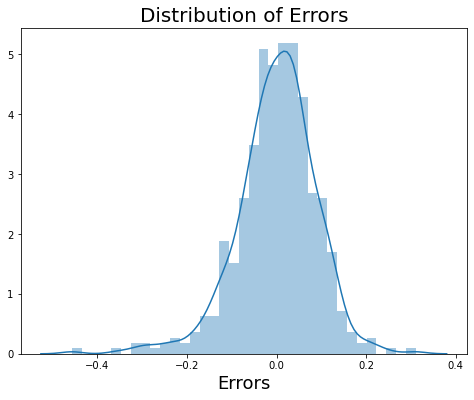

In [78]:
# Plot the histogram of the error terms
plt.figure(figsize=(8,6))
sns.distplot((y_train - y_train_pred), bins = 35)
plt.title('Distribution of Errors',fontdict={'fontsize':20})
plt.xlabel('Errors', fontsize = 18)
plt.show()

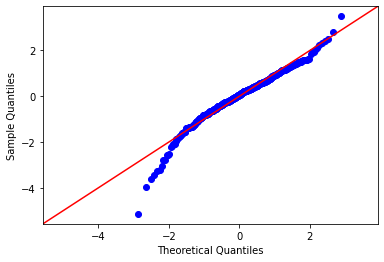

In [79]:
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

- As we can witness the residual terms, centered at (0), are perfectly Gaussian in nature, extended more towards the left.

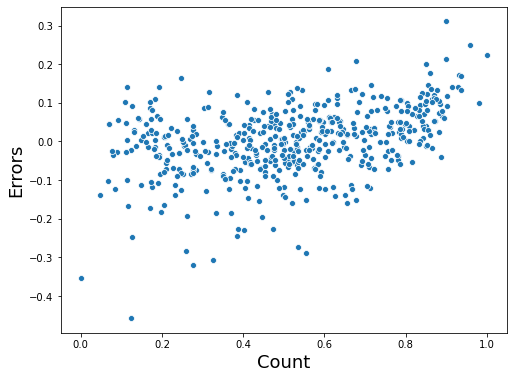

In [80]:
# Checking the homoscedasticity

plt.figure(figsize=(8,6))
sns.scatterplot(y_train,(y_train-y_train_pred))
plt.xlabel('Count', fontsize = 18)
plt.ylabel('Errors',fontsize=18)
plt.show()

- As is seen, residuals are varying constantly w.r.t. the response, which proves their homoscedasticity.

In [81]:
# Checking the independence of residuals

print('The Durbin-Watson value for Final Model is',
round(sm.stats.stattools.durbin_watson((y_train - y_train_pred)),4))

The Durbin-Watson value for Final Model is 2.0195


- The Durbin-Watson factor tells about the auto-correlation present in the observations. It usually lies between 0 to 4 and anything close to 2 (which is the case here, 2.0195) implies there is no auto-correlation among the values.

# Prediction Using the Final Model

In [82]:
# First scaling the test dataset
nume_vars=['temp','hum','windspeed','cnt']

df_test[nume_vars]=scaler.transform(df_test[nume_vars])
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Oct,Sept,Mon,Sat,Sun,Thr,Tues,Wed,2,3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.319635,0.027397
std,0.500722,0.188034,0.481313,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [83]:
df_test.columns

Index([        'yr',    'holiday', 'workingday',       'temp',        'hum',
        'windspeed',        'cnt',     'Spring',     'Summer',     'Winter',
              'Aug',        'Dec',        'Feb',        'Jan',        'Jly',
               'Jn',        'Mar',        'May',        'Nov',        'Oct',
             'Sept',        'Mon',        'Sat',        'Sun',        'Thr',
             'Tues',        'Wed',            2,            3],
      dtype='object')

In [84]:
# Dividing into X and Y-test datasets
y_test=df_test.pop('cnt')
X_test=df_test

In [85]:
# Adding a constant variable to the X_test
X_test=sm.add_constant(X_test)

# Dropping the dropped features from the X_test_lm
X_test=X_test[X_train_lm.columns]

# Making predictions using the last model
y_pred=lm_13.predict(X_test)

# Model Evaluation
Now we'll evaluate the efficacy of the model by plotting the graph for the acual vs the predicted values of 'cnt' variable.

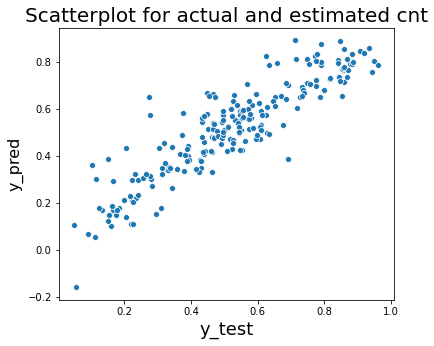

In [86]:
# Plotting y_test and y_pred to understand the spread
plt.figure(figsize=(6,5))
sns.scatterplot(y_test, y_pred)
plt.title('Scatterplot for actual and estimated cnt',fontdict={'fontsize':20})          
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16)      
plt.show()

In [87]:
# Evaluating the R-squared for observed and estimated data
from sklearn.metrics import r2_score
r2=round(r2_score(y_test, y_pred),4)
r2

0.81

- R-squared score of the model lm_13 on the test dataset is coming out to be 0.81 and that on the training datset is 0.838, which implies that the model is as accurate in making predictions on the test set as on the train set. Therefore the model built using the train dataset fits perfectly well on the test dataset.

In [88]:
# Calculating adjusted R-squared for the test dataset

# n is number of rows in test dataset
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
adjusted_r2

0.7939

- As against the R-squared value of 0.81, we obtain an adj R-squared of 0.7939, which is quite impressive in terms of the generalising power of the model.

In [89]:
#  Calculating RMSE
from math import sqrt
from sklearn.metrics import mean_squared_error

RMSE = round(sqrt(mean_squared_error(y_test, y_pred)),4)
RMSE

0.095

In [90]:
# Calculating Mean Absolute Error
from sklearn.metrics import mean_absolute_error
MAE=round(mean_absolute_error(y_test,y_pred),4)
MAE

0.0711

- Both RMSE and MAE are well within the permissible ranges, exhibiting that the model built by us is really efficient in making accurate predictions.

# Model summary

- 
We can see that the equation of our best fitted line is:

$ cnt = 0.212  + 0.234 \times yr -0.091 \times + 0.438 \times temp - 0.158 \times windspeed + 0.076 \times Summer + 0.133 \times Winter + 0.045 \times Aug - 0.053 \times -0.041 \times -0.078 \times Jan - 0.041 \times Nov + 0.101 \times Sept - 0.027 \times Mon - 0.031 \times Tues - 0.083 \times Cloudy - 0.294 \times Light Rain $

  where the coefficients of each feature are the factor by which the response variable would change, when that variable is increased by one unit and rest of the variables are kept constant. The bike rental can still increase by a factor of 0.212 in the absence of all the predictors.

In [91]:
round(lm_13.params.sort_values(axis=0,ascending=False),3)

temp         0.438
yr           0.234
const        0.213
Winter       0.133
Sept         0.101
Summer       0.077
Aug          0.045
Mon         -0.028
Tues        -0.032
Nov         -0.042
Feb         -0.048
Dec         -0.053
Jan         -0.078
2           -0.083
holiday     -0.091
windspeed   -0.158
3           -0.295
dtype: float64

- From the table above, we can come to following conclusions:

1) The predictor 'temp' has a positive impact on the demand of bike, having a coefficient of 0.438.

2) '3', ie 'Light Rain' conditions reduce the bike rentals by a factor of 0.295.

3) 'yr' coefficient of 0.234 also indicates a rise in the rental amount of bikes.

In a nutshell, it is advisable for the management team to lay extra emphasis on the above three varaibles to understand the demand dynamics of the market in the post-Covid scenario. To maximise the profits of the company, Summer season, having high temperature and mostly clear skies, is the ideal time to increase the share of bikes and rev up the marketing quotient to increase the bike rentals.

# THE END